In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import collections
import string
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import defaultdict 
import nltk
from sklearn.cluster import KMeans
from decimal import Decimal 

In [ ]:
header = ['Did you find this conference helpful for your career?']

In [10]:
df = pd.read_csv("Virtual Assembly Feedback _ 2020_06_01_noNames2.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Did you find this conference helpful for your career?                 123 non-null    object
 1   If yes, please explain how?                                           122 non-null    object
 2   What information was the most useful?                                 123 non-null    object
 3   What could be improved for the next conference?                       112 non-null    object
 4   What are you looking for the most right now in your career journey?   122 non-null    object
 5   How and in what ways Future for Us has supported you?                 119 non-null    object
 6   Would you attend another Future for Us virtual conference?            123 non-null    object
dtypes: object

,Did you find this conference helpful for your career?,"If yes, please explain how?",What information was the most useful?,What could be improved for the next conference?,What are you looking for the most right now in your career journey?,How and in what ways Future for Us has supported you?,Would you attend another Future for Us virtual conference?
0,Yes,Inspirational thoughts and approaches to bette...,Minda Hart and Tiffany Dufu,NaN,A great crew of people to navigate entrepreneu...,Creating a safe space to talk about issues oft...,Yes
1,Yes,So empowering!! This is just what I needed,Minda really resonated with me as I just this ...,Would love the opportunity to network with eve...,Queer WOC mentors,"SO many, so much emotional labor in our day to...",Yes
2,Yes,Some many tips for getting unstuck,Money conversation,It was awesome,Progression,NaN,Yes
3,Yes,I am currently unemployed and this conference ...,All of it- it was so important to hear from wo...,This was perfect.,Help finding a new job and new tribe,Education and support,Yes
4,Yes,understanding that i'm not alone and there are...,so much of what the speakers said. its not eno...,make it in person!,kindness.,bringing amazing people together.,Yes


In [11]:
df.columns

Index(['Did you find this conference helpful for your career?',
       'If yes, please explain how? ',
       'What information was the most useful? ',
       'What could be improved for the next conference? ',
       'What are you looking for the most right now in your career journey? ',
       'How and in what ways Future for Us has supported you?',
       'Would you attend another Future for Us virtual conference?'],
      dtype='object')

In [15]:
rename_cols = ({"Did you find this conference helpful for your career?":"was_useful",
               "If yes, please explain how? ":"how_useful",
               "What information was the most useful? ":"which_useful",
               "What could be improved for the next conference? ":"improvements",
               "What are you looking for the most right now in your career journey? ":"current_needs",
               "How and in what ways Future for Us has supported you?":"ffu_supported",
               "Would you attend another Future for Us virtual conference?":"attend_again"})

In [16]:
df.rename(columns=rename_cols,inplace=True)
df.columns

Index(['was_useful', 'how_useful', 'which_useful', 'improvements',
       'current_needs', 'ffu_supported', 'attend_again'],
      dtype='object')

In [18]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   was_useful     123 non-null    object
 1   how_useful     122 non-null    object
 2   which_useful   123 non-null    object
 3   improvements   112 non-null    object
 4   current_needs  122 non-null    object
 5   ffu_supported  119 non-null    object
 6   attend_again   123 non-null    object
dtypes: object(7)
memory usage: 6.9+ KB


,was_useful,how_useful,which_useful,improvements,current_needs,ffu_supported,attend_again
0,Yes,Inspirational thoughts and approaches to bette...,Minda Hart and Tiffany Dufu,NaN,A great crew of people to navigate entrepreneu...,Creating a safe space to talk about issues oft...,Yes
1,Yes,So empowering!! This is just what I needed,Minda really resonated with me as I just this ...,Would love the opportunity to network with eve...,Queer WOC mentors,"SO many, so much emotional labor in our day to...",Yes
2,Yes,Some many tips for getting unstuck,Money conversation,It was awesome,Progression,NaN,Yes
3,Yes,I am currently unemployed and this conference ...,All of it- it was so important to hear from wo...,This was perfect.,Help finding a new job and new tribe,Education and support,Yes
4,Yes,understanding that i'm not alone and there are...,so much of what the speakers said. its not eno...,make it in person!,kindness.,bringing amazing people together.,Yes


In [21]:
for c in df.columns:
    print(c)
    print(df[c].nunique())
    print(" ")

was_useful
2
 
how_useful
122
 
which_useful
123
 
improvements
112
 
current_needs
122
 
ffu_supported
119
 
attend_again
1
 


In [22]:
df['was_useful'].value_counts()

Yes    120
No       3
Name: was_useful, dtype: int64

In [57]:
df.dropna(how='any',inplace=True)

# Create lists of text for each column

In [71]:
how_useful = list(df['how_useful'].astype(str))
how_useful = " ".join(t for t in how_useful)
how_useful = how_useful.lower().translate(str.maketrans('', '', string.punctuation))
len(how_useful)

17173

In [72]:
which_useful = list(df['which_useful'].astype(str))
which_useful = " ".join(t for t in which_useful)
which_useful = which_useful.lower().translate(str.maketrans('', '', string.punctuation))
len(which_useful)

12134

In [74]:
improvements = list(df['improvements'].astype(str))
improvements = " ".join(t for t in improvements)
improvements = improvements.lower().translate(str.maketrans('', '', string.punctuation))
len(improvements)

16592

In [75]:
current_needs = list(df['current_needs'].astype(str))
current_needs = " ".join(t for t in current_needs)
current_needs = current_needs.lower().translate(str.maketrans('', '', string.punctuation))
len(current_needs)

10315

In [76]:
ffu_supported = list(df['ffu_supported'].astype(str))
ffu_supported = " ".join(t for t in ffu_supported)
ffu_supported = ffu_supported.lower().translate(str.maketrans('', '', string.punctuation))
len(ffu_supported)

12985

# Create wordclouds for each

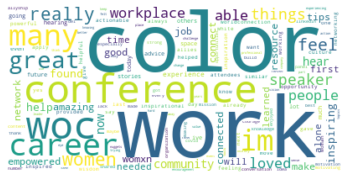

In [77]:
# Test on first column
wordcloud1 = WordCloud(max_font_size=100, max_words=150, collocations=False, background_color='white').generate(how_useful)
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

In [85]:
text_lists = [how_useful, which_useful, improvements, current_needs, ffu_supported]

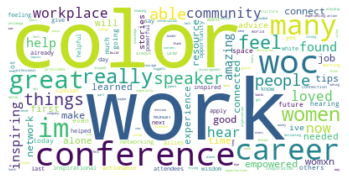

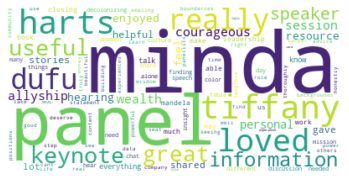

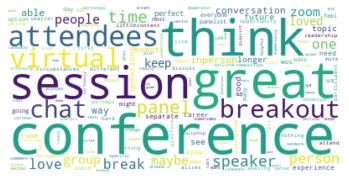

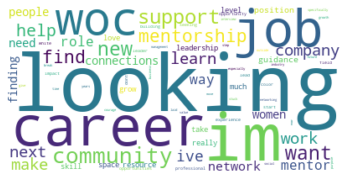

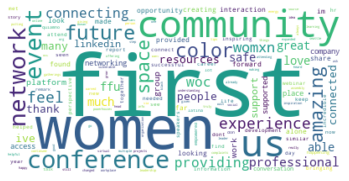

In [86]:
for tl in text_lists: 
    wordcloud = WordCloud(max_font_size=100, max_words=150, collocations=False, background_color='white').generate(tl)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Look at the top words and their counts for each column

In [79]:
# test on first column
words = [word for word in how_useful.split() if word not in STOPWORDS]
counted_words = collections.Counter(words)
counted_words.most_common(30)

[('work', 19),
 ('color', 18),
 ('woc', 17),
 ('conference', 16),
 ('career', 16),
 ('many', 15),
 ('im', 14),
 ('great', 14),
 ('really', 14),
 ('women', 14),
 ('feel', 11),
 ('things', 10),
 ('able', 9),
 ('workplace', 9),
 ('loved', 9),
 ('community', 9),
 ('now', 9),
 ('hear', 9),
 ('people', 8),
 ('inspiring', 8),
 ('speakers', 8),
 ('found', 8),
 ('amazing', 7),
 ('empowered', 7),
 ('help', 7),
 ('good', 7),
 ('connect', 7),
 ('connected', 7),
 ('tips', 7),
 ('womxn', 7)]

In [87]:
for tl in text_lists: 
    words = tl.split()
    words = [word for word in tl.split() if word not in STOPWORDS]
    counted_words = collections.Counter(words)
    print(counted_words.most_common(30))
    print(' ')

[('work', 19), ('color', 18), ('woc', 17), ('conference', 16), ('career', 16), ('many', 15), ('im', 14), ('great', 14), ('really', 14), ('women', 14), ('feel', 11), ('things', 10), ('able', 9), ('workplace', 9), ('loved', 9), ('community', 9), ('now', 9), ('hear', 9), ('people', 8), ('inspiring', 8), ('speakers', 8), ('found', 8), ('amazing', 7), ('empowered', 7), ('help', 7), ('good', 7), ('connect', 7), ('connected', 7), ('tips', 7), ('womxn', 7)]
 
[('minda', 21), ('harts', 16), ('loved', 14), ('tiffany', 14), ('really', 12), ('panel', 12), ('useful', 11), ('great', 10), ('information', 10), ('speakers', 9), ('courageous', 9), ('wealth', 9), ('allyship', 9), ('personal', 9), ('keynote', 9), ('enjoyed', 8), ('session', 8), ('hearing', 8), ('feel', 8), ('dufu', 7), ('helpful', 7), ('resources', 7), ('stories', 7), ('gave', 6), ('lot', 6), ('shared', 6), ('everything', 6), ('panels', 6), ('know', 6), ('women', 5)]
 
[('conference', 22), ('think', 19), ('great', 19), ('attendees', 18), 

# Try Topic Modeling and Clustering on one column

In [90]:
wue_cleaned = []
which_useful_entries = list(df['which_useful'].astype(str))
for e in which_useful_entries: 
    e = e.lower().translate(str.maketrans('', '', string.punctuation))
    wue_cleaned.append(e)
wue_cleaned

['minda really resonated with me as i just this morning gave notice due to toxicity ',
 'all of it it was so important to hear from women from diverse backgrounds who all have different advice to give',
 'so much of what the speakers said its not enough to open the door you have to pull ppl thru it too ',
 'who are you willing to be courageous for',
 'i really enjoyed the decolonizing wealth session with mandala i was able to learn a lot of valuable taekaways',
 'allyship panel was excellent ',
 'steps to being a culture shifter and building your own personal mission statement',
 'being a culture carrier and setting boundaries ',
 'definitions shared by presenters this would be a great resource to compile',
 'see above',
 'minda harts closing keynote was so great and inspiring',
 'loved the info about money as a tool to move your personal mission ',
 'minda harts and courageous leadership',
 'hearing from the speakers who were open vulnerable and speaking from the heart',
 'i really en

### Count Vectorizer

In [93]:
cv_vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2))

In [94]:
words_cv = cv_vectorizer.fit_transform(wue_cleaned).toarray()
pd.DataFrame(words_cv, columns=cv_vectorizer.get_feature_names())

,99,99 panels,ab,ab toxic,able,able connect,able hear,able learn,able real,able relate,...,wrong,wrong table,year,year value,young,young females,younger,younger generation,youve,youve wanna
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### LSA

In [95]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [96]:
num_topics = 50
lsa = TruncatedSVD(num_topics)
topics_lsa_cv = lsa.fit_transform(words_cv)
display_topics(lsa, cv_vectorizer.get_feature_names(), 10)


Topic  0
tara, loved, personal, dufus, beautiful, smart, personal mantra, mantra, mother, useful

Topic  1
minda, harts, minda harts, just, wealth, feel, tiffany, know, really, tiffany dufu

Topic  2
wealth, feel, building, just, wealth building, company, finding, like, feel like, environment

Topic  3
really, work, enjoyed, information, hearing, panelists, really enjoyed, color, power, useful

Topic  4
values, great, book, world, closing, tool, recognize values, recognize, quotable moments, quotable

Topic  5
work, hearing, color, positions, power, values, positions power, women color, different, careers

Topic  6
useful, feel, having, stories, things, woc, let, appreciated, time, share

Topic  7
stories, feel, appreciated, make, insight, panels, loved, tangible, tiffany dufu, dufu

Topic  8
resources, lot, helpful, shared, wisdom, leadership, courageous, loved, table, just

Topic  9
really, loved, personal, helpful, helped, courageous, personal stories, understand, discussion, stats

In [99]:
# Show weights for each topic 

cols = [x for x in range(num_topics)]
topic_weights_df = pd.DataFrame(topics_lsa_cv.round(1),
             index = wue_cleaned,
             columns = cols)
topic_weights_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
minda really resonated with me as i just this morning gave notice due to toxicity,0.1,0.9,-0.1,-0.0,-0.2,0.1,-0.1,-0.2,-0.0,0.4,...,-0.2,0.5,-1.2,-0.1,0.1,0.2,-0.1,0.4,-0.4,0.3
all of it it was so important to hear from women from diverse backgrounds who all have different advice to give,0.0,0.1,-0.0,0.3,-0.1,0.2,0.1,-0.1,0.0,-0.1,...,-0.0,-0.1,-0.0,-0.3,0.0,-0.7,0.6,-0.9,0.2,-0.3
so much of what the speakers said its not enough to open the door you have to pull ppl thru it too,0.0,0.1,-0.0,0.0,0.0,0.0,-0.1,0.1,0.0,0.0,...,0.0,-0.3,0.0,-0.0,-0.1,-0.3,0.1,0.5,0.4,0.0


In [100]:
scores = defaultdict()
for n in range(2,60):
    num_clusters = n
    km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
    km.fit(topic_weights_df)
    cluster_labels = km.fit_predict(topic_weights_df)
    cluster_labels
    silhouette_avg = silhouette_score(topic_weights_df, cluster_labels)
    scores[n]=silhouette_avg
    print("N: " + str(n) + ", Score: " + str(silhouette_avg))

N: 2, Score: 0.34614881577356144
N: 3, Score: 0.349182459584416
N: 4, Score: 0.3195867885558155
N: 5, Score: 0.31986756307909614
N: 6, Score: 0.3306304629905019
N: 7, Score: 0.323611487389097
N: 8, Score: 0.10558648737836156
N: 9, Score: 0.10111914350697522
N: 10, Score: 0.10387620898377282
N: 11, Score: 0.11826053225289321
N: 12, Score: 0.09959595007704561
N: 13, Score: 0.10646502257127416
N: 14, Score: 0.1092016082533072
N: 15, Score: 0.11184739341131192
N: 16, Score: 0.11582633762654637
N: 17, Score: 0.12137339626413504
N: 18, Score: 0.12455670612511255
N: 19, Score: 0.10049512160674363
N: 20, Score: 0.10762698454449172
N: 21, Score: 0.09651254747782202
N: 22, Score: 0.07520113627092949
N: 23, Score: 0.07730635223054184
N: 24, Score: 0.0836254851400884
N: 25, Score: 0.08812113586686576
N: 26, Score: 0.09360743627335683
N: 27, Score: 0.09923495665369099
N: 28, Score: 0.1032421763042498
N: 29, Score: 0.07281095377962084
N: 30, Score: 0.07514183859155547
N: 31, Score: 0.081357726709624

In [102]:
scores_df = pd.DataFrame.from_dict(scores,orient='index').reset_index()
scores_df.rename(columns={"index":'n', 0:'score'},inplace=True)
scores_df.head()

,n,score
0,2,0.346149
1,3,0.349182
2,4,0.319587
3,5,0.319868
4,6,0.330630


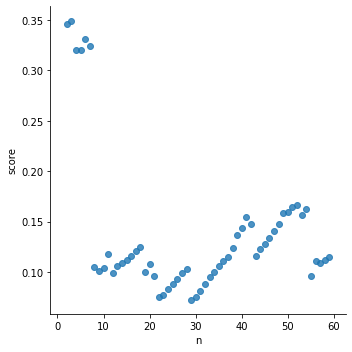

In [103]:
sns.lmplot(x='n',y='score',data=scores_df,fit_reg=False)

In [104]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(topic_weights_df)
km.inertia_

1236.4159863945579

In [105]:
cluster_map = pd.DataFrame()
cluster_map['Needs'] = topic_weights_df.index.values
cluster_map['cluster'] = km.labels_
cluster_map

,Needs,cluster
0,minda really resonated with me as i just this ...,3
1,all of it it was so important to hear from wom...,3
2,so much of what the speakers said its not enou...,3
3,who are you willing to be courageous for,3
4,i really enjoyed the decolonizing wealth sessi...,3
...,...,...
103,insights about how i do deserve a good workpla...,3
104,the session about money talk to me was really ...,1
105,the information that was most useful to be was...,3
106,minda harts session and the fireside chat,3


In [106]:
cluster_map.cluster.value_counts()

3    98
0     6
5     1
4     1
2     1
1     1
Name: cluster, dtype: int64

In [107]:
num_clusters = 18
km18 = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km18.fit(topic_weights_df)
print(km18.inertia_)
cluster_map18 = pd.DataFrame()
cluster_map18['Needs'] = topic_weights_df.index.values
cluster_map18['cluster'] = km18.labels_
cluster_map18

813.4357374517374


,Needs,cluster
0,minda really resonated with me as i just this ...,1
1,all of it it was so important to hear from wom...,1
2,so much of what the speakers said its not enou...,1
3,who are you willing to be courageous for,1
4,i really enjoyed the decolonizing wealth sessi...,1
...,...,...
103,insights about how i do deserve a good workpla...,1
104,the session about money talk to me was really ...,6
105,the information that was most useful to be was...,7
106,minda harts session and the fireside chat,4


In [108]:
cluster_map18.cluster.value_counts()

1     74
4     14
0      5
16     1
2      1
3      1
5      1
6      1
7      1
17     1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
8      1
Name: cluster, dtype: int64

In [109]:
selected_clusters = [1,4,0]
for selected in selected_clusters: 
    print(cluster_map18[cluster_map18.cluster == selected].head(10))
    print(cluster_map18[cluster_map18.cluster == selected].tail(10))

                                               Needs  cluster
0  minda really resonated with me as i just this ...        1
1  all of it it was so important to hear from wom...        1
2  so much of what the speakers said its not enou...        1
3           who are you willing to be courageous for        1
4  i really enjoyed the decolonizing wealth sessi...        1
5                      allyship panel was excellent         1
6  steps to being a culture shifter and building ...        1
7    being a culture carrier and setting boundaries         1
8  definitions shared by presenters this would be...        1
9                                          see above        1
                                                 Needs  cluster
90   i loved all the speakers i could watch which w...        1
91                  courageous leadership vs cautious         1
93   during the ending keynote with minda it was ve...        1
96   there were so many personal takeaways that wer...        

### It's not really sorting into different topics 

I could just look at # of people who mentioned things like the keynotes and the panels 

In [112]:
keywords_which_useful = ['minda', 'hart', 'keynote', 'dufu', 'tiff', 'ally', 'panel', 'culture', 'wealth', 'mandela', 'dixon', 'cru']

In [113]:
count_which_useful = defaultdict()
for keyword in keywords_which_useful: 
    counter = 0
    for entry in wue_cleaned:
        if keyword in entry: 
            counter += 1
    count_which_useful[keyword]= counter
count_which_useful

defaultdict(None,
            {'minda': 22,
             'hart': 16,
             'keynote': 11,
             'dufu': 11,
             'tiff': 18,
             'ally': 22,
             'panel': 19,
             'culture': 4,
             'wealth': 8,
             'mandela': 5,
             'dixon': 1,
             'cru': 2})

In [118]:
wu_df = pd.DataFrame.from_dict(count_which_useful, orient='index').reset_index()
wu_df['Keyword'] = keywords_which_useful
wu_df.rename(columns={'index':'search_term', 0:'Number of Attendees'},inplace=True)
wu_df = wu_df.sort_values(by='Number of Attendees', ascending=False)
wu_df['Percent of Attendees'] = wu_df['Number of Attendees'].apply(lambda x: round(Decimal(x/123*100),1))
wu_df

,search_term,Number of Attendees,Keyword,Percent of Attendees
0,minda,22,minda,17.9
5,ally,22,ally,17.9
6,panel,19,panel,15.4
4,tiff,18,tiff,14.6
1,hart,16,hart,13.0
2,keynote,11,keynote,8.9
3,dufu,11,dufu,8.9
8,wealth,8,wealth,6.5
9,mandela,5,mandela,4.1
7,culture,4,culture,3.3
